# miniGPT-v0.1

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Preprocess

In [2]:
train_1 = pd.read_parquet('./data/wikitext/train-00000-of-00002.parquet')
train_2 = pd.read_parquet('./data/wikitext/train-00001-of-00002.parquet')
train = pd.concat([train_1, train_2], axis=0)
train.shape
train.head()

(1801350, 1)

,text
0,
1,= Valkyria Chronicles III = \n
2,
3,Senjō no Valkyria 3 : Unrecorded Chronicles (...
4,"The game began development in 2010 , carrying..."


In [3]:
test = pd.read_parquet('./data/wikitext/test-00000-of-00001.parquet')
valid = pd.read_parquet('./data/wikitext/validation-00000-of-00001.parquet')
test.shape , valid.shape

((4358, 1), (3760, 1))

In [30]:
import re

In [4]:
data = ' '.join(train['text'].astype(str)) 
data[:1000]

'  = Valkyria Chronicles III = \n   Senjō no Valkyria 3 : Unrecorded Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . Employing the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " Calamaty Raven " . \n  The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles II . While it retained the standard features of the series , it also underwent multiple adjustments , such as making the game more forgiving for seri

In [6]:
# len(data) # 540,095,682 characters = 540 M 
unq_chars =  ''.join(sorted(set(data)))
unq_chars , len(unq_chars)

('\n !"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~\x8f\x92\x93\x94\x96\x9d¡¢£¤¥§©«\xad®¯°±²³´µ¶·¹º»¼½¾¿ÀÁÂÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿĀāĂăąĆćĉĊċČčĎďĐđĒēĔĕĖėęĚěğĠġĢģĤĦħĩĪīĭįİıĵĶķĸĺļĽľŁłńņňŊŋŌōŏőŒœŖŗŘřŚśŜŞşŠšŢţťŧũŪūŭůűųŵŷŹźŻżŽžſƀƆƇƈƉƍƎƏƐƒƔƙƛơƢƥƭưƲƿǀǁǂǃǎǐǑǒǔǚǜǝǢǣǦǧǪǫǭǰǵǷǸǹǽȘșȚțȜȝȟȯȳȷȼɈɐɑɒɓɔɕɖɗɘəɚɛɜɞɟɠɡɢɣɤɥɦɧɨɪɫɬɭɮɯɰɱɲɳɴɵɶɷɸɹɺɻɽɾʀʁʂʃʄʇʈʉʊʋʌʍʎʏʐʑʒʔʕʖʗʘʙʛʝʟʠʡʢʰʱʲʳʷʹʻʼʽʾʿˀˁˆˇˈˌːˑ˔˕˖˘˚˜˞ˠˢˣˤ˥˦˧˨˩̧̖̗̝̞̟̠̣̤̥̩̪̬̮̯̰̱̲̳̺͍̀́̂̃̄̆̇̈̊̋̌̍̏̐̑̽͌̚͘͜͡΄ΆΈΉΊΌΎΐΑΒΓΔΕΖΗΘΙΚΛΜΝΞΟΠΡΣΤΥΦΧΨΩάέήίαβγδεζηθικλμνξοπρςστυφχψωϊόύώϑϕϝϟϵЂЄІЇЈЉЋАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяёђєіїјљњћѝўѠѡѢѣѥѧѮѹ҆ғқүҳҷӣӨөӯӶӷԱԲԳԴԵԶԷԸԹԺԻԼԽԿՀՁՂՃՄՅՆՇՈՊՋՌՍՎՏՓՔՕաբգդեզէըթժիլխծկհձղճմյնշոչպջռսվտրցւփքօևְֱֲֳִֵֶַָֹֻּֽֿׁׂ֤֫אבגדהוזחטיךכלםמןנסעףפץצקרשתױ׳،ءآأؤإئابةتثجحخدذرزسشصضطظعغـفقكلمنهوىئًٌٍَُِّْ١٧ٰپچڈڠکڬگںھہیۍےەܐܒܔܕܗܘܙܚܛܝܠܡܢܣܥܦܪܬܼ݂ܲܵँंःअआइईउऋएऐऔकखगघङचछजञटठडणतथदधनपफबभमयरलवशषसह़ऽािीुूृॆेैॉॊोौ्ॐ।॥१२३ংঅআইএকখগঙচজটডঢণতথদনপবভমযরলশষসহ়ািীুূেৈো্ৰਂਅਉਖ

In [24]:
print(unq_chars[:96])
chars_count = 96 
chars = unq_chars[:96]
data[12000:12000 + 50]


 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~


'bout seven times through the music production due '

In [25]:
pattern = f"[{re.escape(chars)}\s]"
data2 = ''.join(re.findall(pattern, data))
print(len(data2)) # 539440918

539440918


In [28]:
len(data2)
data2[:2000]

539440918

'  = Valkyria Chronicles III = \n   Senj no Valkyria 3 : Unrecorded Chronicles ( Japanese : 3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . Employing the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " Calamaty Raven " . \n  The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles II . While it retained the standard features of the series , it also underwent multiple adjustments , such as making the game more forgiving for series newcomer

In [31]:
def clean_words(text):
    text = re.sub(r'[ ]+', ' ', text)
    text = re.sub(r'[\n]+', '\n', text)
    text = re.sub(r'@.*?@', ' ', text)
    text = re.sub(r'\(\s*\)', ' ', text)
    text = re.sub(r'\[\s*\]', ' ', text)
    text = re.sub(r'\{\s*\}', ' ', text)
    return text.strip()
data3 = clean_words(data2)

len(data3) , len(data2) - len(data3)

(534851193, 4589725)

In [32]:
data4 = clean_words(data3)
len(data4) , len(data3) - len(data4)

(532467393, 2383800)

In [33]:
data5 = clean_words(data4)
len(data5) , len(data4) - len(data5)

(532467359, 34)

In [34]:
data6 = clean_words(data5)
len(data6) , len(data5) - len(data6)

(532467359, 0)

In [36]:
final_data = data6
open('./data/wikitext/processed.txt', 'w').write(final_data)

532467359

### PReprocess - extract articles 

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
heading = r'\s=.*=\s'
hs = re.findall(heading, data)

In [ ]:
headings = []
for h in hs:
    if re.findall(r'=',h).count('=') == 2:
        headings.append(h)
len(headings),headings[:10]

(29525,
 [' = Valkyria Chronicles III = ',
  ' = Tower Building of the Little Rock Arsenal = ',
  ' = Cicely Mary Barker = ',
  " = Gambia women 's national football team = ",
  ' = Plain maskray = ',
  ' = 2011 – 12 Columbus Blue Jackets season = ',
  ' = Position ; GP = ',
  ' = Goals ; A = ',
  ' = Points ; PIM = ',
  ' = Games Played ; TOI = '])

In [ ]:
headings[100:100 + 15]

[' = West Hendford Cricket Ground , Yeovil = ',
 " = New Year 's Eve ( Up All Night ) = ",
 ' = World War Z = ',
 ' = Sentence spacing = ',
 ' = The Crab with the Golden Claws = ',
 ' = L.A.M.B. = ',
 ' = First @-@ move advantage in chess = ',
 ' = Frederick Reines = ',
 ' = Lock Haven , Pennsylvania = ',
 ' = Rachel Green = ',
 ' = Krak des Chevaliers = ',
 ' = The Importance of Being Earnest = ',
 ' = Lloyd Mathews = ',
 ' = HMS Boreas ( H77 ) = ',
 ' = Kaimanawa horse = ']

In [ ]:
for i in re.finditer(headings[100 + 3], data):
    idx = i.start()
    print(data[idx : idx + 10000])

 = Sentence spacing = 
   Sentence spacing is the horizontal space between sentences in typeset text . It is a matter of typographical convention . Since the introduction of movable @-@ type printing in Europe , various sentence spacing conventions have been used in languages with a Latin alphabet . These include a normal word space ( as between the words in a sentence ) , a single enlarged space , and two full spaces . 
  Until the 20th century , publishing houses and printers in many countries used additional space between sentences . There were exceptions to this traditional spacing method — some printers used spacing between sentences that was no wider than word spacing . This was French spacing — a term synonymous with single @-@ space sentence spacing until the late 20th century . With the introduction of the typewriter in the late 19th century , typists used two spaces between sentences to mimic the style used by traditional typesetters . While wide sentence spacing was phased o

In [ ]:
articles = []
heading_idx = {}
for h in range(len(headings)):
    try:
        for i in re.finditer(headings[h], data):
            heading_idx[h] = i.start()
            break
    except:
        heading_idx[h] = None
len(heading_idx)

KeyboardInterrupt: 

In [ ]:
for i in range(len(headings)):
    if i == len(headings) - 1:
        articles.append(data[heading_idx[i]:])
    else:
        articles.append(data[heading_idx[i]:heading_idx[i+1]]) 

In [ ]:
article_lens = np.array([len(a) for a in articles])
print(f'Data len : {len(data)}\nArticles len: {article_lens.sum()} , {article_lens.mean()}' )

## Load Data

In [2]:
data = open('./data/wikitext/processed.txt', 'r').read()
print(len(data)) # 532,467,359 characters = 532 M

532467359


### Viz

In [28]:
from collections import Counter
c = Counter(data)
c.most_common(20)

[(' ', 104392756),
 ('e', 49091225),
 ('t', 34095601),
 ('a', 33724387),
 ('n', 29289422),
 ('i', 28992651),
 ('o', 28818255),
 ('r', 26331592),
 ('s', 25200925),
 ('h', 19044643),
 ('l', 16223446),
 ('d', 16030336),
 ('c', 12135913),
 ('u', 10275908),
 ('m', 9441795),
 ('f', 8448546),
 ('g', 7719415),
 ('p', 7513193),
 ('w', 6528108),
 ('y', 6026960)]

In [37]:
occ = dict(c.items())
occ = dict(sorted(occ.items(), key=lambda x: x[1], reverse=True))

<Figure size 1000x500 with 0 Axes>

<BarContainer object of 96 artists>

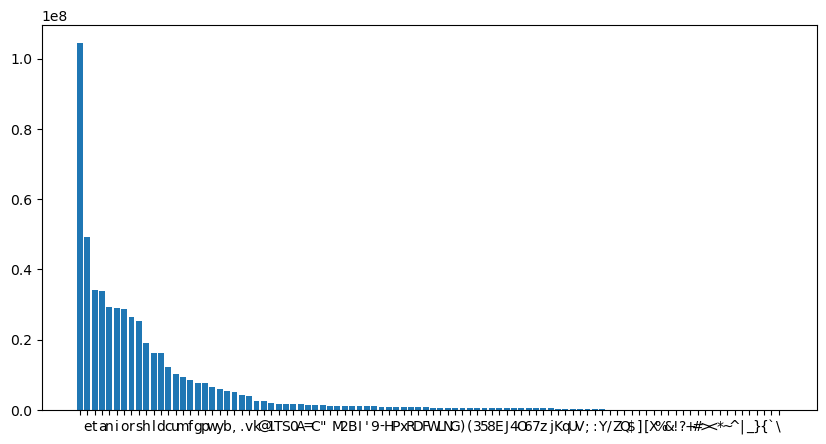

In [38]:
plt.figure(figsize=(10, 5))
plt.bar(occ.keys(), occ.values())
plt.show() 

In [42]:
chars = ''.join(sorted(list(occ.keys())))
chars, len(chars), chars[0]

('\n !"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~',
 96,
 '\n')

### Encoding 

#### indexing

In [3]:
chars = ''.join(sorted(list(set(data))))
chars, len(chars), chars[0]

('\n !"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~',
 96,
 '\n')

In [4]:
def enc(x, chars = chars):
    idxs = []
    for c in x:
        idxs.append(chars.index(c))
    return idxs

def dec(x, chars = chars):
    txt = ''
    for i in x:
        txt += chars[i]
    return txt

enc('a', chars)
dec(enc('a', chars),chars)

[66]

'a'

In [5]:
enc(' ', chars), dec(enc(' ', chars),chars)
enc('Mahanth Yalla', chars), dec(enc('Mahanth Yalla', chars),chars)

([1], ' ')

([46, 66, 73, 66, 79, 85, 73, 1, 58, 66, 77, 77, 66], 'Mahanth Yalla')

#### tiktoken

In [3]:
import tiktoken 

tik = tiktoken.get_encoding('gpt2')
tik.encode('a')
tik.decode(tik.encode('a'))

[64]

'a'

In [4]:
tik.encode('Mahanth Yalla')
tik.decode(tik.encode('Mahanth Yalla'))

[44, 19210, 400, 575, 30315]

'Mahanth Yalla'

In [5]:
# tik.encode('&^$%": >;.][>}{>.][][1239-]}]')
# tik.decode(tik.encode('&^$%": >;.][>}{>.][][1239-]}]'))

### select encoder

In [6]:
# indexing
enc = enc
dec = dec
vocab_size = len(chars)

# # tiktoken
# enc = tik.encode
# dec = tik.decode
# vocab_size = tik.vocab_size

development purpose, taking first 1M chars only 

In [7]:
data = data[:1000000]

In [8]:
data = torch.tensor(enc(data), dtype=torch.long)
data.shape, data.dtype 
data[:25]

(torch.Size([1000000]), torch.int64)

tensor([30,  1, 55, 66, 77, 76, 90, 83, 74, 66,  1, 36, 73, 83, 80, 79, 74, 68,
        77, 70, 84,  1, 42, 42, 42])

In [9]:
n1 = int(0.8 * len(data))
n2 = int(0.9 * len(data))
Xtr = data[:n1]
Xdev = data[n1:n2]
Xte = data[n2:]
Xtr.shape, Xdev.shape, Xte.shape

(torch.Size([800000]), torch.Size([100000]), torch.Size([100000]))

##### Batch Training

In [10]:
block_size  = 8
Xtr[:block_size] , dec(Xtr[:block_size].numpy().astype(int)) , Xtr[block_size+1] , dec([Xtr[block_size].item()])

(tensor([30,  1, 55, 66, 77, 76, 90, 83]), '= Valkyr', tensor(66), 'i')

In [12]:
start = 100
for s in range(block_size):
    context = Xtr[start:start + s]
    target = Xtr[start + s]
    print(f'{dec(context.numpy().astype(int))} -> {dec([target.item()])}')


 -> y
y -> r
yr -> i
yri -> a
yria ->  
yria  -> o
yria o -> f
yria of ->  


In [22]:
batch_size = 4 
def get_batch(split):
    if split == 'train':
        X = Xtr
    elif split == 'dev':
        X = Xdev
    else:
        X = Xte
    start = np.random.randint(0, len(X) - block_size - 1, (batch_size,))
    X_batch = torch.stack([X[s:s + block_size] for s in start])
    y_batch = torch.stack([X[s+1:s + block_size+1] for s in start])
    return X_batch, y_batch

X_batch, y_batch = get_batch('train')
X_batch.shape, y_batch.shape

(torch.Size([4, 8]), torch.Size([4, 8]))

In [23]:
X_batch, y_batch

(tensor([[80, 79,  1, 80, 71,  1, 81, 83],
         [79, 69,  1, 83, 70, 69, 74, 84],
         [66,  1, 68, 80, 79, 84, 74, 69],
         [77, 74, 85, 90,  1, 84, 85, 86]]),
 tensor([[79,  1, 80, 71,  1, 81, 83, 80],
         [69,  1, 83, 70, 69, 74, 84, 85],
         [ 1, 68, 80, 79, 84, 74, 69, 70],
         [74, 85, 90,  1, 84, 85, 86, 69]]))

In [24]:
for i in range(batch_size):
    for s in range(1,block_size):
        print(f'{dec(X_batch[i].numpy().astype(int))[:s]} -> {dec(y_batch[i].numpy().astype(int))[s-1]}')


o -> n
on ->  
on  -> o
on o -> f
on of ->  
on of  -> p
on of p -> r
n -> d
nd ->  
nd  -> r
nd r -> e
nd re -> d
nd red -> i
nd redi -> s
a ->  
a  -> c
a c -> o
a co -> n
a con -> s
a cons -> i
a consi -> d
l -> i
li -> t
lit -> y
lity ->  
lity  -> s
lity s -> t
lity st -> u


# miniGPT-v1.0 - Bi-gram Model

expected loss

In [11]:
-np.log(1/vocab_size)

4.564348191467836

REUSING : model from [02_char_based_GPT_bigram.py](https://github.com/Mahanth-Maha/mahaMiniGPT/blob/main/02_char_based_GPT_bigram.py)

In [37]:
def get_batch(split):
    if split == 'train':
        X = Xtr
    elif split == 'dev':
        X = Xdev
    else:
        X = Xte
    start = np.random.randint(0, len(X) - block_size - 1, (batch_size,))
    X_batch = torch.stack([X[s:s + block_size] for s in start])
    y_batch = torch.stack([X[s+1:s + block_size+1] for s in start])
    return X_batch, y_batch

class BiGramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super(BiGramLanguageModel, self).__init__()
        self.vocab_size = vocab_size
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, x, y=None):
        # (batch_size, block_size, vocab_size)
        logits = self.token_embedding_table(x)
        if y is None:
            return logits

        # entropy expects : (N, C) input : (batch_size * block_size, vocab_size)
        loss = F.cross_entropy(logits.view(-1, self.vocab_size), y.view(-1))
        return logits, loss

    def generate(self, x, n_pred):
        for _ in range(n_pred):
            logits = self(x)[:, -1, :]
            prob_dist = F.softmax(logits, -1)
            x = torch.cat([x, torch.multinomial(prob_dist, 1)], -1)
        return x
    
model = BiGramLanguageModel(vocab_size)
# model.to('cpu')
logits, loss = model(X_batch,y_batch)
logits.shape, loss.item()

(torch.Size([4, 8, 96]), 4.853832721710205)

In [ ]:
out = model.generate(X_batch, 10) 
out.shape
out_strs = [dec(x.numpy().astype(int)) for x in out]
out_strs
# literally random !!! 

torch.Size([4, 18])

['on of pr ROP+Ah[N_',
 'nd redisjd* D@3Wl-',
 'a considY/WRfhA({y',
 'lity stu_BeaKxeHbV']

In [38]:
def estimate_loss(model):
    with torch.no_grad():
        X_batch, y_batch = get_batch('dev')
        logits, loss = model(X_batch, y_batch)
        return loss.item()

estimate_loss(model)

5.162155628204346

Training using ~~SGD~~ AdamW

In [40]:
alpha = 1e-3
optimiser = optim.AdamW(model.parameters(), lr=alpha) 

In [44]:
batch_size = 64
block_size = 16
n_iters = 10000

In [45]:
for iter in range(n_iters):
    x, y = get_batch('train')
    logits, loss = model(x, y)
    loss.backward()
    optimiser.step()
    optimiser.zero_grad(set_to_none=True)
    if iter % (n_iters // 10) == 0:
        dev_loss = estimate_loss(model)
        print(f'Iter : {iter}, Train Loss : {loss.item():.4f}, Valid Loss : {dev_loss:.4f}')

Iter : 0, Train Loss : 3.8952, Valid Loss : 3.9066
Iter : 10000, Train Loss : 2.3962, Valid Loss : 2.4708


KeyboardInterrupt: 